In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("Datasets-main/TaxiFare.csv")

In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [5]:
df.describe().style.background_gradient(cmap="rainbow")

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [6]:
df.shape

(50000, 8)

In [7]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [8]:
correlation_mat=df.corr()

<AxesSubplot:>

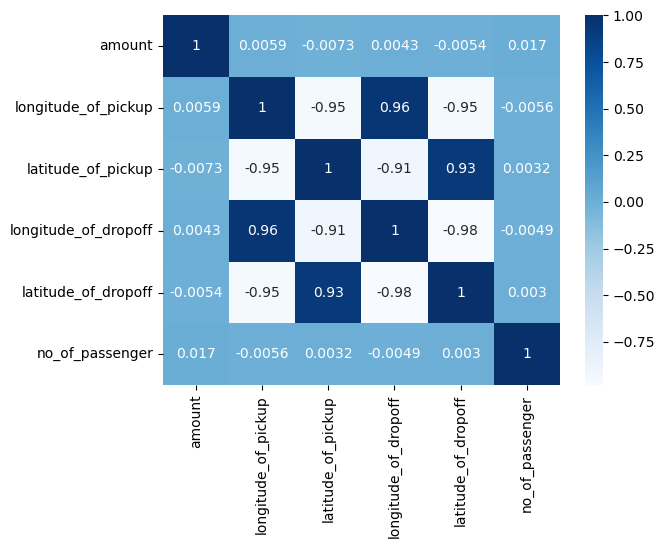

In [9]:
sns.heatmap(correlation_mat,annot=True,cmap="Blues")

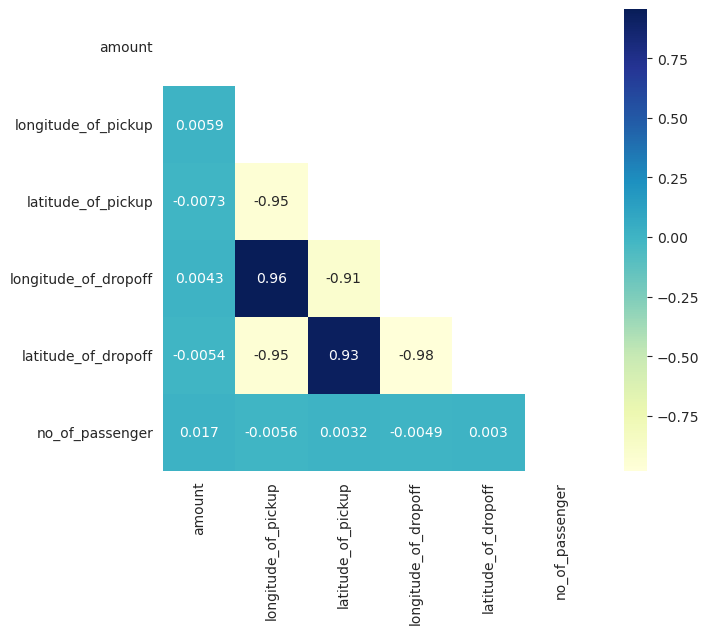

In [10]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style("white"):
    f, ax=plt.subplots(figsize=(7,6))
    ax=sns.heatmap(correlation_mat, mask=mask,annot=True,cmap='YlGnBu')

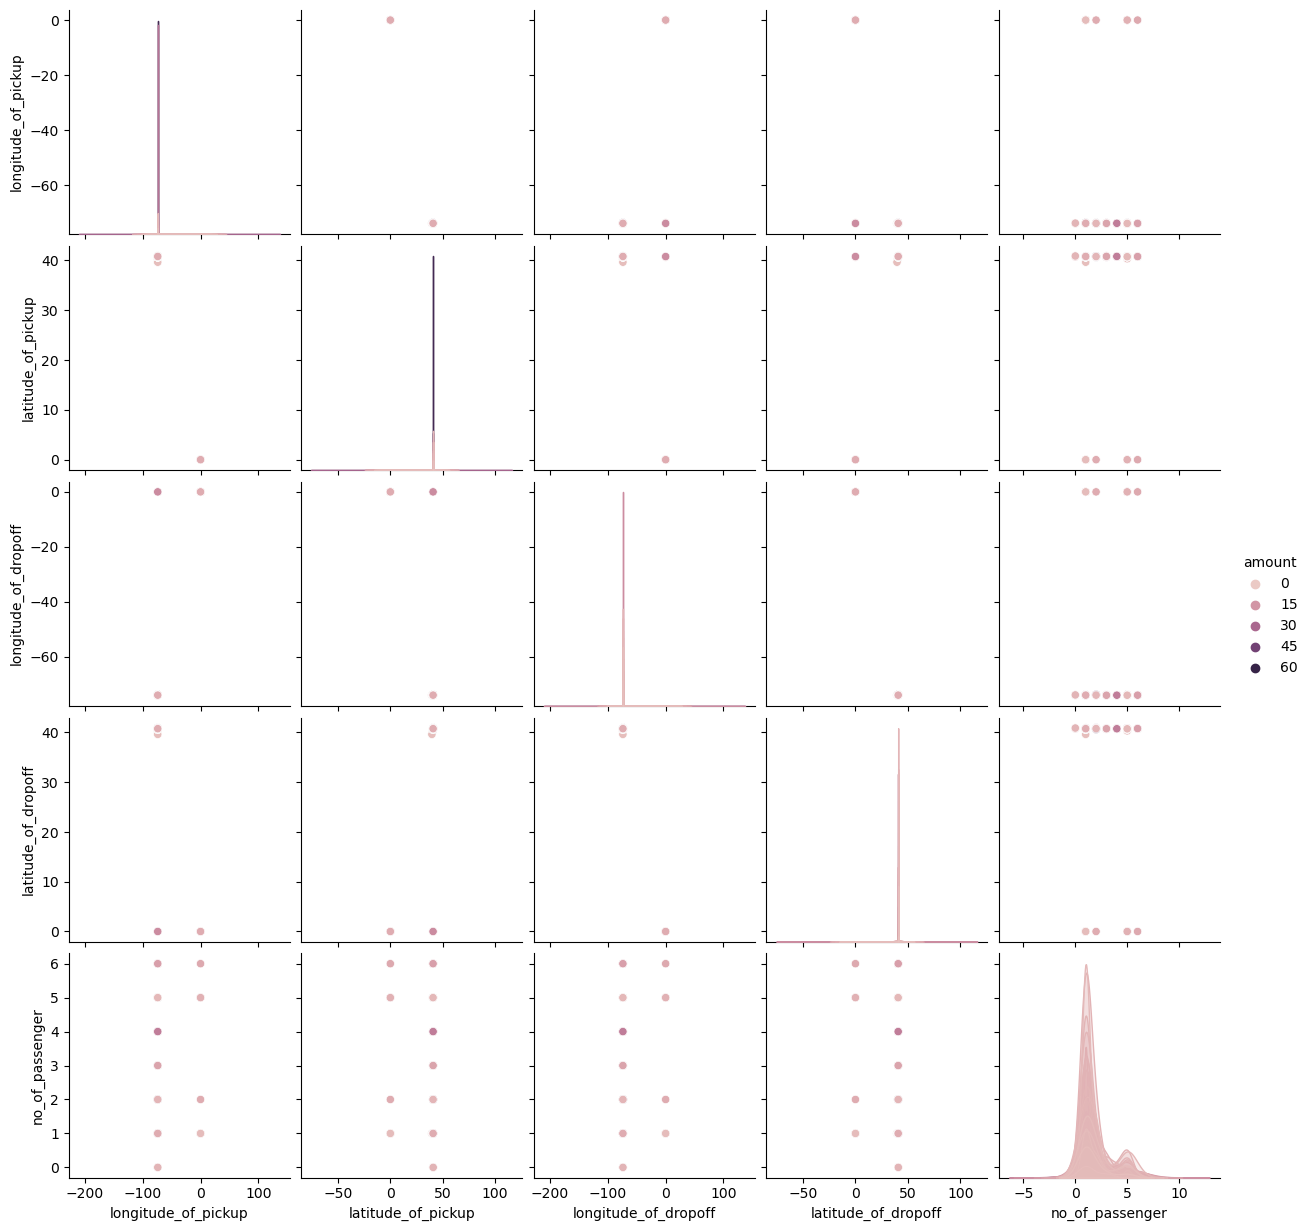

In [11]:
df_subset = df.sample(n=1000)
sns.pairplot(df_subset, hue='amount')
plt.show()

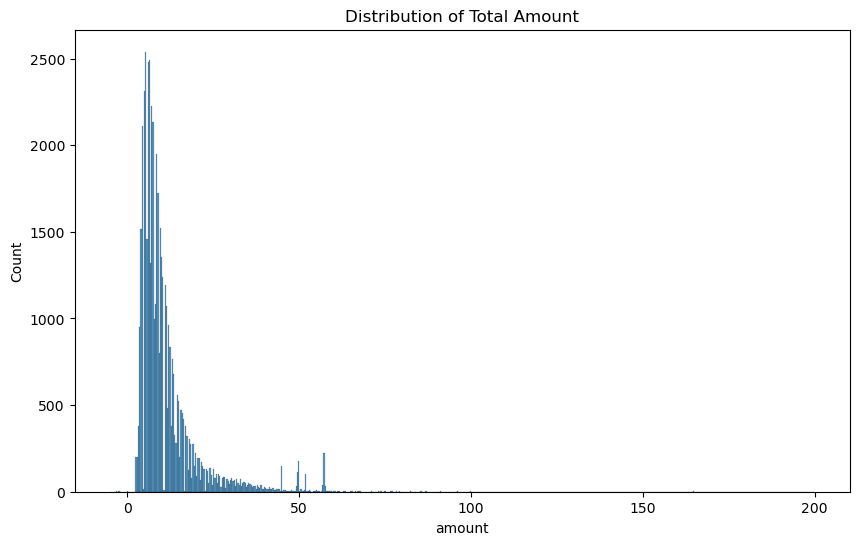

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['amount'])
plt.title('Distribution of Total Amount')
plt.show()

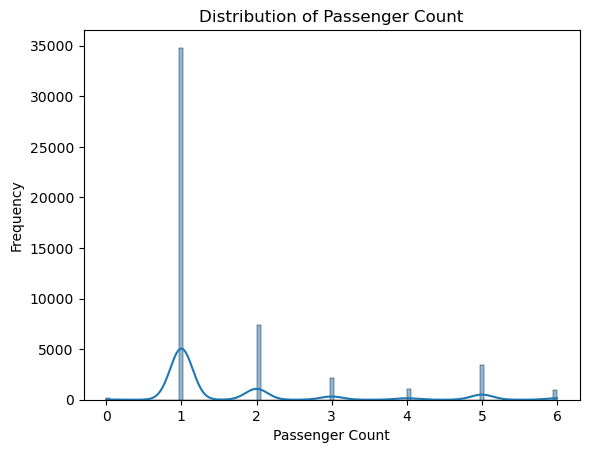

In [13]:
sns.histplot(data=df, x='no_of_passenger', kde=True)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

In [14]:
numeric_features = df.select_dtypes(include= 'number')
numeric_features.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger'],
      dtype='object')

In [15]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['unique_id', 'date_time_of_pickup'], dtype='object')

<AxesSubplot:xlabel='longitude_of_pickup'>

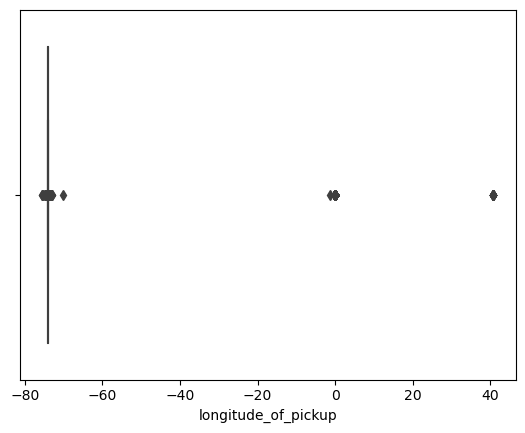

In [16]:
sns.boxplot(x="longitude_of_pickup",data=df)

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range= Q1 - (1.5 * IQR)
    upper_range= Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [18]:
lowerValue,upperValue=remove_outlier(df['no_of_passenger'])
df['no_of_passenger']=np.where(df['no_of_passenger']>upperValue,upperValue,df['no_of_passenger'])
df['no_of_passenger']=np.where(df['no_of_passenger']<lowerValue,lowerValue,df['no_of_passenger'])

In [19]:
lowerValue,upperValue=remove_outlier(df['amount'])
df['amount']=np.where(df['amount']>upperValue,upperValue,df['amount'])
df['amount']=np.where(df['amount']<lowerValue,lowerValue,df['amount'])

In [20]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [21]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

df['pickup_hour'] = df['date_time_of_pickup'].dt.hour
df['pickup_minute']=df['date_time_of_pickup'].dt.minute
df['pickup_day'] = df['date_time_of_pickup'].dt.day
df['pickup_month'] = df['date_time_of_pickup'].dt.month
df['pickup_Year']=df['date_time_of_pickup'].dt.year
df['day_of_week'] = df['date_time_of_pickup'].dt.dayofweek
df['is_weekend'] = df[['day_of_week']].applymap(lambda x: 1 if x >= 5 else 0).values

In [22]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_hour,pickup_minute,pickup_day,pickup_month,pickup_Year,day_of_week,is_weekend
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,17,26,15,6,2009,0,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,16,52,5,1,2010,1,0
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,0,35,18,8,2011,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,4,30,21,4,2012,5,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,7,51,9,3,2010,1,0


In [23]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_hour             0
pickup_minute           0
pickup_day              0
pickup_month            0
pickup_Year             0
day_of_week             0
is_weekend              0
dtype: int64

In [24]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                     float64
pickup_hour                           int64
pickup_minute                         int64
pickup_day                            int64
pickup_month                          int64
pickup_Year                           int64
day_of_week                           int64
is_weekend                            int64
dtype: object

In [25]:
X = df.drop(['unique_id','amount'], axis=1)
y = df['amount']

In [26]:
def haversine(df):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lat1 = np.radians(df["latitude_of_pickup"])
    lat2 = np.radians(df["latitude_of_dropoff"])
    #### Based on the formula  x1=drop_lat,x2=dropoff_long 
    dlat = np.radians(df['latitude_of_dropoff']-df["latitude_of_pickup"])
    dlong = np.radians(df["longitude_of_dropoff"]-df["longitude_of_pickup"])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [27]:
df['Total distance']=haversine(df)

In [28]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_hour,pickup_minute,pickup_day,pickup_month,pickup_Year,day_of_week,is_weekend,Total distance
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,17,26,15,6,2009,0,0,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,16,52,5,1,2010,1,0,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,0,35,18,8,2011,3,0,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,4,30,21,4,2012,5,1,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,7,51,9,3,2010,1,0,1.999157


In [29]:
df.drop(["date_time_of_pickup","longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"],axis=1,inplace=True)

In [30]:
df.head()

,unique_id,amount,no_of_passenger,pickup_hour,pickup_minute,pickup_day,pickup_month,pickup_Year,day_of_week,is_weekend,Total distance
0,26:21.0,4.5,1.0,17,26,15,6,2009,0,0,1.030764
1,52:16.0,16.9,1.0,16,52,5,1,2010,1,0,8.450134
2,35:00.0,5.7,2.0,0,35,18,8,2011,3,0,1.389525
3,30:42.0,7.7,1.0,4,30,21,4,2012,5,1,2.799270
4,51:00.0,5.3,1.0,7,51,9,3,2010,1,0,1.999157


In [31]:
df.dtypes

unique_id           object
amount             float64
no_of_passenger    float64
pickup_hour          int64
pickup_minute        int64
pickup_day           int64
pickup_month         int64
pickup_Year          int64
day_of_week          int64
is_weekend           int64
Total distance     float64
dtype: object

In [32]:
X = df.drop('unique_id', axis=1)
y = df['amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor': SVR()
}

In [34]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(model)
    print('------------------------------------------------------')
    print(f'{name} accuracy for train: {model.score(X_train, y_train)}')
    print(f'{name} accuracy for test: {model.score(X_test, y_test)}')
    print('------------------------------------------------------')
    print('\n')

LinearRegression()
------------------------------------------------------
Linear Regression accuracy for train: 1.0
Linear Regression accuracy for test: 1.0
------------------------------------------------------


DecisionTreeRegressor()
------------------------------------------------------
Decision Tree Regressor accuracy for train: 1.0
Decision Tree Regressor accuracy for test: 0.9999974334300215
------------------------------------------------------


RandomForestRegressor()
------------------------------------------------------
Random Forest Regressor accuracy for train: 0.9999989468301991
Random Forest Regressor accuracy for test: 0.9999985185397811
------------------------------------------------------


GradientBoostingRegressor()
------------------------------------------------------
Gradient Boosting Regressor accuracy for train: 0.9999984592194436
Gradient Boosting Regressor accuracy for test: 0.999998507971072
------------------------------------------------------


Bagging

In [35]:
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)
    print(name)
    print("----------------------")
    abc=pd.DataFrame({'Actual':y_test, 'Predict':predictions[name]})
    print(abc.head())
    print("\n")

for name, pred in predictions.items():
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{name} - Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}")

Linear Regression
----------------------
       Actual  Predict
26247     9.0      9.0
35067     6.5      6.5
34590     9.5      9.5
16668     7.5      7.5
12196     9.0      9.0


Decision Tree Regressor
----------------------
       Actual  Predict
26247     9.0      9.0
35067     6.5      6.5
34590     9.5      9.5
16668     7.5      7.5
12196     9.0      9.0


Random Forest Regressor
----------------------
       Actual  Predict
26247     9.0      9.0
35067     6.5      6.5
34590     9.5      9.5
16668     7.5      7.5
12196     9.0      9.0


Gradient Boosting Regressor
----------------------
       Actual   Predict
26247     9.0  9.001324
35067     6.5  6.498652
34590     9.5  9.500536
16668     7.5  7.499216
12196     9.0  9.001324


Bagging Regressor
----------------------
       Actual  Predict
26247     9.0      9.0
35067     6.5      6.5
34590     9.5      9.5
16668     7.5      7.5
12196     9.0      9.0


AdaBoost Regressor
----------------------
       Actual   Predict
2